In [276]:
from glob import glob
from astroquery.mast import Mast, Observations
import os
import shutil
import numpy as np
import json
import requests
import asdf
from astropy import log
from astropy import wcs
from astropy.io import ascii, fits
from astropy.utils.data import download_file
from astropy.visualization import simple_norm
from astropy.visualization import ImageNormalize, ManualInterval, LogStretch, LinearStretch
from astropy.wcs.utils import skycoord_to_pixel
from astropy.nddata import extract_array

import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.table import Table

from align_to_catalogs import *
import astropy.units as u

import align_to_catalogs

#import jhat

In [274]:
import jhat

2023-08-25 12:35:31,398 - stpipe - WARNING - **WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-062 CANNOT BE CHECKED AGAINST ONLINE VERSION




The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    


In [2]:
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['image.origin'] = 'lower'

In [11]:
files = glob('/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong*')
files

['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_realigned.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_realigned_to_vvv.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_rate.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_tweakregstep.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_trapsfilled.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_realigned_to_vvv_cat.ecsv',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_o002_crf.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_rateints.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_outlier_i2d.fits',
 '/orange/adamginsb

In [12]:
destreak_fn =  '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcalong_destreak_tweakregstep.fits'
destcatt_fn =  '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcalong_destreak_cat.ecsv'

In [13]:
frames = glob('/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_0000*_nrcalong_destreak_tweakregstep.fits')
frames

['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcalong_destreak_tweakregstep.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00004_nrcalong_destreak_tweakregstep.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00003_nrcalong_destreak_tweakregstep.fits']

In [14]:
frames_cat = glob('/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_0000*_nrcalong_destreak_cat.ecsv')
frames_cat

['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak_cat.ecsv',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00004_nrcalong_destreak_cat.ecsv',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00003_nrcalong_destreak_cat.ecsv',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcalong_destreak_cat.ecsv']

In [15]:
tbl = Table.read(destcatt_fn)
#tbl

In [16]:
pwd

'/blue/adamginsburg/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction'

In [17]:
crds_world = ww.pixel_to_world(tbl['x'], tbl['y'])

In [18]:
modules = ('nrca', 'nrcb')
spots = [('02201')]#('08201', '02201')

In [19]:
fn = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00002_nrcalong_destreak.fits'

In [20]:
hdr = fits.getheader(fn, ext=1)
ww = wcs.WCS(hdr)
gwcs = asdf.open(fn).tree['meta']['wcs']
data = np.nan_to_num(fits.getdata(fn, ext=1))

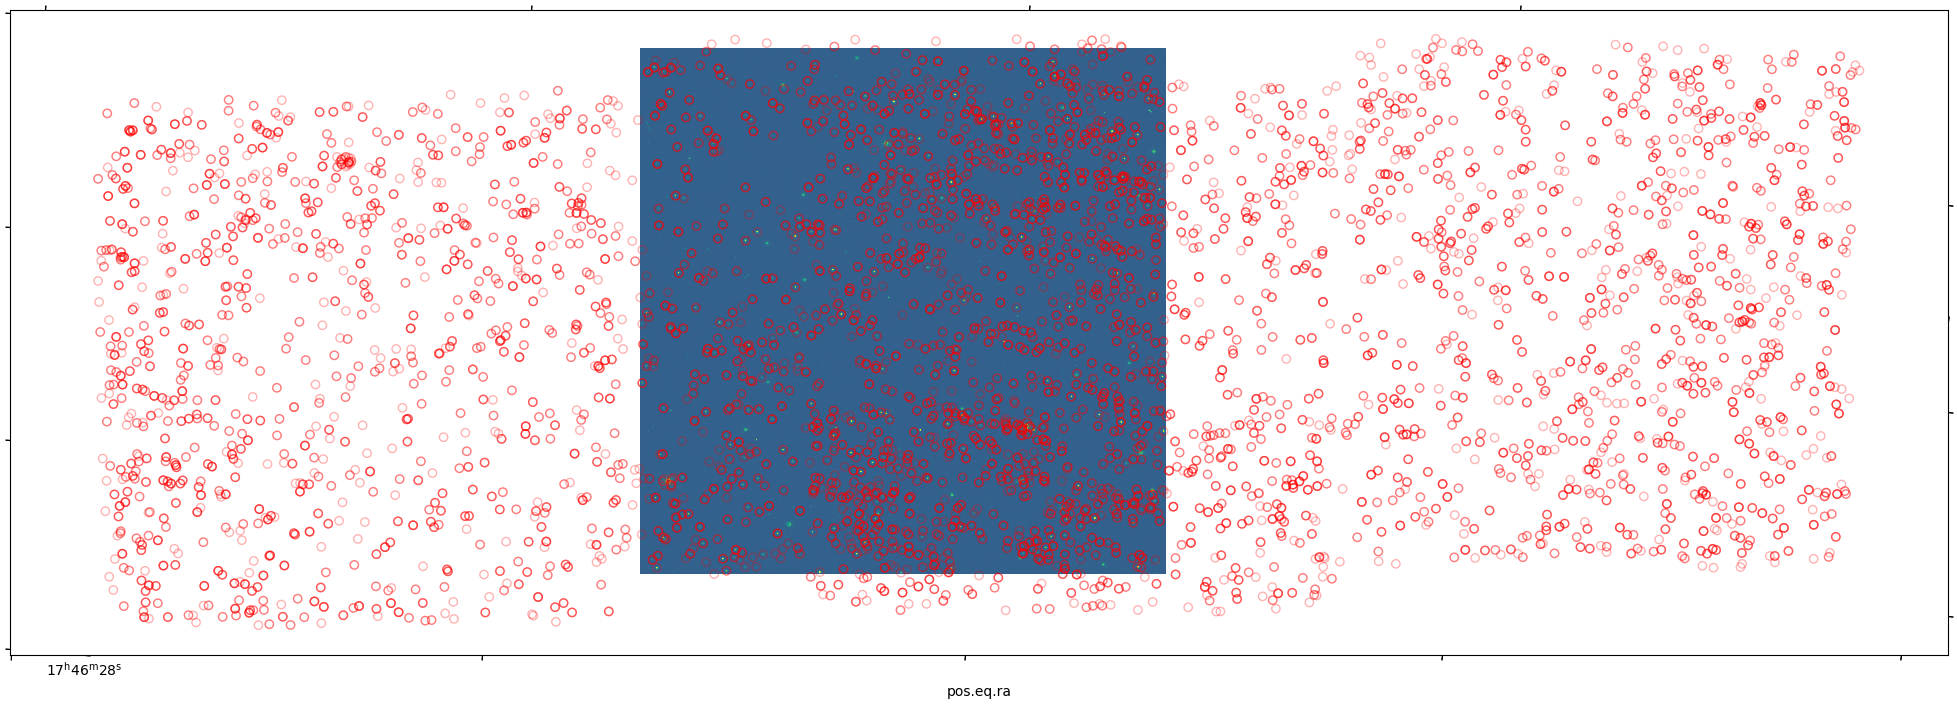

In [21]:
hdr = fits.getheader(fn, ext=1)
ww = wcs.WCS(hdr)
gwcs = asdf.open(fn).tree['meta']['wcs']
data = np.nan_to_num(fits.getdata(fn, ext=1))

plt.figure(figsize=(25, 25))
ax = plt.subplot(projection=wcs.WCS(fits.getheader(fn, ext=1)))
ax.imshow(data, norm=simple_norm(data, stretch='log', max_percent=99.95, log_a=1))

for mod in modules:
    for visit in ('1', '2'):
        for spot in spots:
            for i in range(4):
                fr = i+1
                fn = f'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw0222100200{visit}_{spot}_0000{fr}_{mod}long_destreak.fits'
                can = f'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw0222100200{visit}_{spot}_0000{fr}_{mod}long_destreak_cat.ecsv'
                tbl = Table.read(can)
                hdr = fits.getheader(fn, ext=1)
                ww = wcs.WCS(hdr)
                gwcs = asdf.open(fn).tree['meta']['wcs']
                data = fits.getdata(fn, ext=1)
                crds_world = ww.pixel_to_world(tbl['x'], tbl['y'])

                ax.scatter(crds_world.ra, crds_world.dec, edgecolor='r', facecolor='none', transform=ax.get_transform('world'), alpha=0.3)

In [22]:
tbl

id,x,y,flux
int64,float64,float64,float64
1,621.2940611617745,1955.6917748267003,129.74777221679688
2,1924.6225887408293,1353.1151932968876,117.66533660888672
3,834.4107260144619,744.1449322093862,116.68500518798828
4,1231.9626095232338,1900.9257881265435,115.72077178955078
5,781.9416486133372,1496.9115196898447,115.44808197021484
6,380.9327363226995,24.125942748159414,115.39495849609375
7,83.45762801518481,1193.9561444298563,114.55294036865234
8,1448.1494399509706,1197.334357306664,108.4721908569336
9,1343.3458724309207,739.255169883588,107.93773651123047


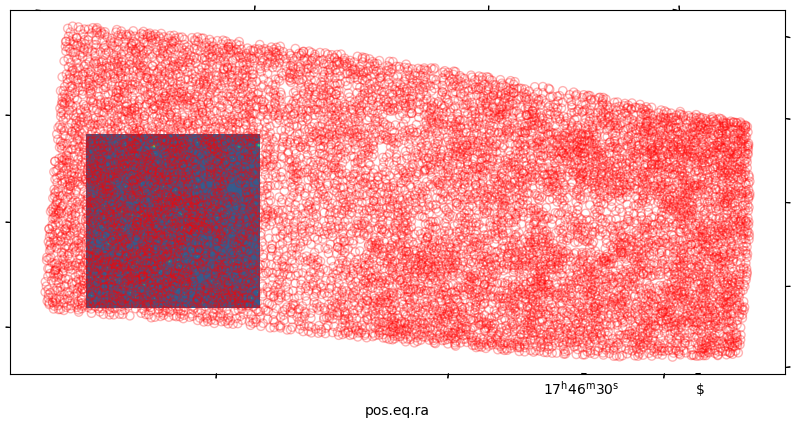

In [23]:
fn = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcalong_destreak_tweakregstep.fits'
cat = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-F405N-merged_vvvcat.ecsv'

tbl = Table.read(cat)
hdr = fits.getheader(fn, ext=1)
ww = wcs.WCS(hdr)
gwcs = asdf.open(fn).tree['meta']['wcs']
data = np.nan_to_num(fits.getdata(fn, ext=1))
crds = tbl['skycoord']
#crds_in = crds[reg[0].contains(crds, wcs=wcs.WCS(fits.getheader(files[0], ext=1)))]

plt.figure(figsize=(10,10))
ax = plt.subplot(projection=wcs.WCS(fits.getheader(fn, ext=1)))
ax.imshow(np.nan_to_num(data), norm=simple_norm(data, stretch='log', max_percent=99.95, log_a=1))
ax.scatter(crds.ra, crds.dec, edgecolor='r', facecolor='none', transform=ax.get_transform('world'), alpha=0.3)

2023-08-07 14:54:55,466 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2023-04-25T05:05:59.722' from MJD-BEG.
Set DATE-AVG to '2023-04-25T05:06:26.564' from MJD-AVG.
Set DATE-END to '2023-04-25T05:06:53.406' from MJD-END'.
  warnings.warn(

2023-08-07 14:54:55,469 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to  -119.975053 from OBSGEO-[XYZ].
Set OBSGEO-B to   -11.515215 from OBSGEO-[XYZ].
Set OBSGEO-H to 1386464604.607 from OBSGEO-[XYZ]'.
  warnings.warn(

2023-08-07 14:54:56,582 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2023-04-25T04:58:28.778' from MJD-BEG.
Set DATE-AVG to '2023-04-25T04:58:55.620' from MJD-AVG.
Set DATE-END to '2023-04-25T04:59:22.462' from MJD-END'.
  

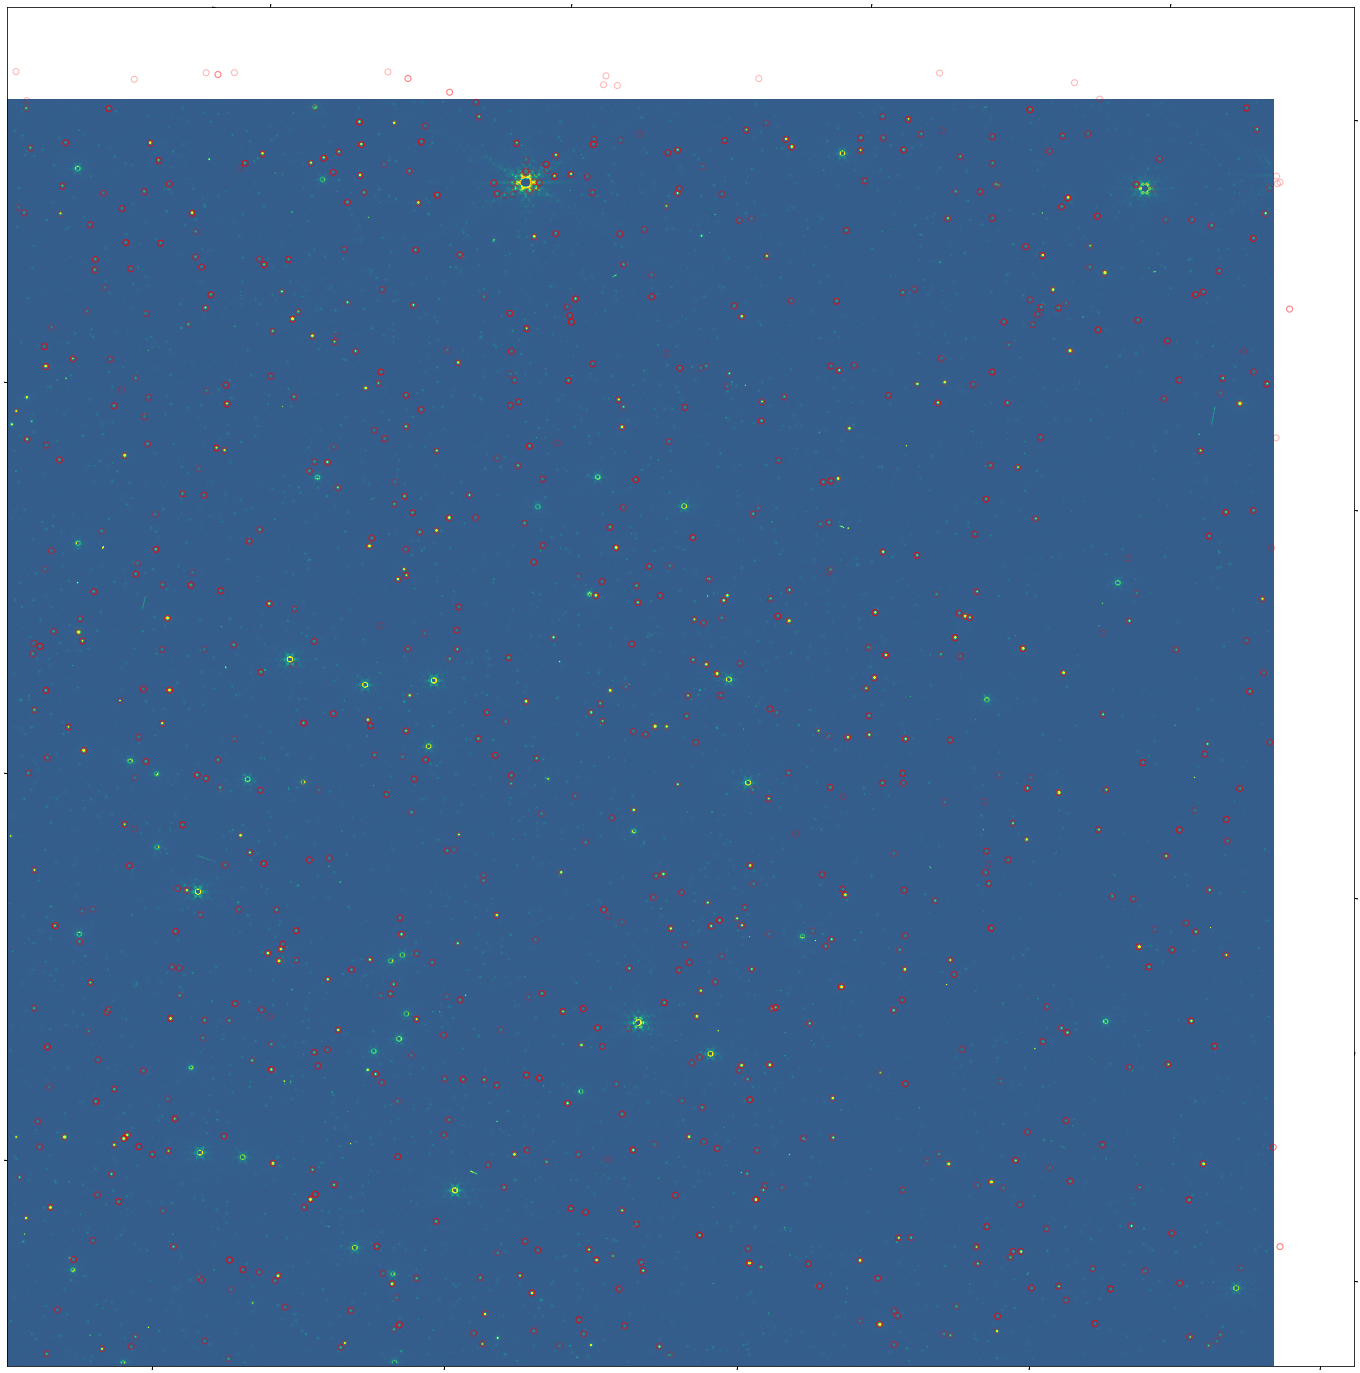

In [47]:
plt.figure(figsize=(25, 25))
ax = plt.subplot(projection=wcs.WCS(fits.getheader(fn, ext=1)))
ax.imshow(np.nan_to_num(data), norm=simple_norm(data, stretch='log', max_percent=99.95, log_a=1))

for i in range(4):
    fr = i+1
    fn = f'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_0000{fr}_nrcalong_destreak_tweakregstep.fits'
    can = f'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_0000{fr}_nrcalong_destreak_cat.ecsv'
    tbl = Table.read(can)
    hdr = fits.getheader(fn, ext=1)
    ww = wcs.WCS(hdr)
    gwcs = asdf.open(fn).tree['meta']['wcs']
    data = np.nan_to_num(fits.getdata(fn, ext=1))
    crds_world = ww.pixel_to_world(tbl['x'], tbl['y'])

    ax.scatter(crds_world.ra, crds_world.dec, edgecolor='r', facecolor='none', transform=ax.get_transform('world'), alpha=0.3)

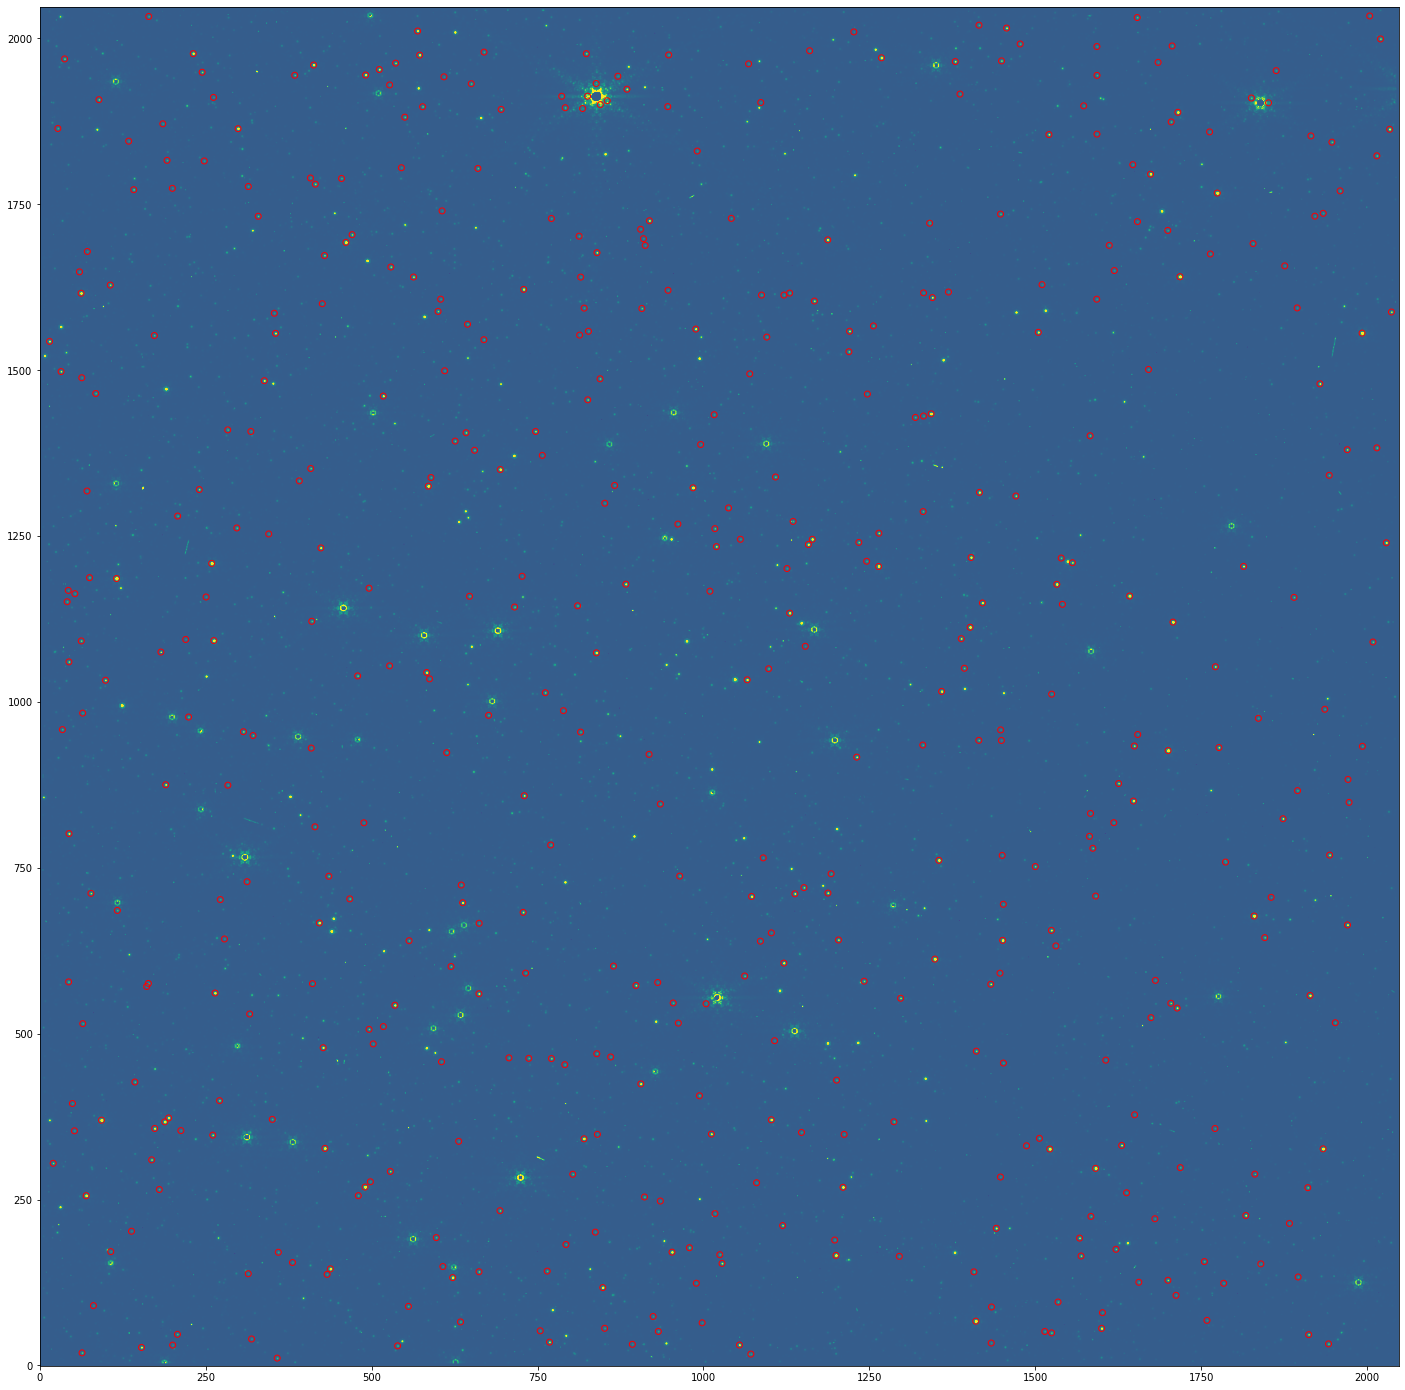

In [48]:
plt.figure(figsize=(25,25))
#data = fits.getdata(destreak_fn, ext=1)
plt.imshow(np.nan_to_num(data), norm=simple_norm(data, stretch='log', max_percent=99.95, log_a=1))
plt.scatter(tbl['x'], tbl['y'], edgecolor='r', facecolor='none')
plt.savefig('test.pdf')

In [57]:
reg = regions.Regions.read('/orange/adamginsburg/jwst/cloudc/regions/ref.reg')

In [145]:
pwd

'/blue/adamginsburg/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction'

In [293]:
file = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_tweakregstep.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00001_nrcalong_destreak.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_tweakregstep.fits'
#'/blue/adamginsburg/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction/jw02221002002_02201_00004_nrcalong_destreak_copy_tweakregstep.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_tweakregstep.fits'
#ofile = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak.fits'
imfile = '/blue/adamginsburg/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction/jw02221002002_02201_00004_nrcalong_destreak_copy_jhat.fits'
#'/blue/adamginsburg/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction/jw02221002001_08201_00001_nrcalong_destreak_tweakregstep.fits'
#'/blue/adamginsburg/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction/jw02221002002_02201_00004_nrcalong_destreak_copy_tweakregstep.fits'
#'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_copy.fits'
#shutil.copy(ofile, imfile)

In [294]:
max_offset=0.4*u.arcsec
mag_limit=15

In [295]:
basepath = '/orange/adamginsburg/jwst/cloudc/'
filtername = 'f405n'
module = 'nrca'
fov_regname = 'regions/nircam_cloudc_fov.reg'
fieldnumber = '002'

vvvdr2_crds, vvvdr2 = retrieve_vvv(basepath=basepath, filtername=filtername, module=module, fov_regname=fov_regname, fieldnumber=fieldnumber)

In [296]:
catfile = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_cat.ecsv'
cat = Table.read(catfile)

In [297]:
mag = cat['aper_total_vegamag']
sel = mag < mag_limit
log.info(f"For {filtername} {module} {fieldnumber} catalog {catfile}, found {sel.sum()} of {sel.size} sources meeting criteria mag<{mag_limit}")

if sel.sum() == 0:
    print(f"min mag: {np.nanmin(mag)}, max mag: {np.nanmax(mag)}")
    raise ValueError("No sources passed basic selection criteria")


2023-08-25 12:40:27,179 - stpipe - INFO - For f405n nrca 002 catalog /orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_cat.ecsv, found 9430 of 19563 sources meeting criteria mag<15


INFO: For f405n nrca 002 catalog /orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_cat.ecsv, found 9430 of 19563 sources meeting criteria mag<15 [unknown]


In [298]:
raoffset = 0*u.arcsec
decoffset = -8*u.arcsec

In [299]:
skycrds_cat_orig = cat['sky_centroid']
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
    ww.wcs.crval = ww.wcs.crval #- [raoffset.to(u.deg).value, decoffset.to(u.deg).value]
#skycrds_cat = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])
ww.wcs.crval

array([266.59273646, -28.55648911])

In [300]:
align_fits['SCI',1].header['CRPIX1']

1024.5

In [301]:
align_fits['SCI',1].header['CRPIX2']

1024.5

In [302]:
ref_y,ref_x

(array(1102.59641386), array(1049.0916607))

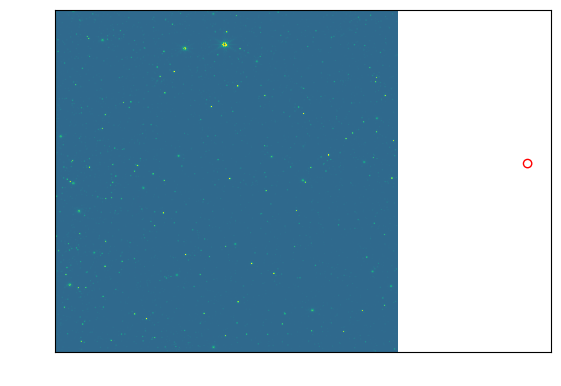

In [303]:
ref_image = file#glob.glob('mastDownload/JWST/*nrcb1*/*cal.fits')[0]

ref_fits = fits.open(ref_image)
ref_data = fits.open(ref_image)['SCI',1].data
norm1=simple_norm(data, stretch='log', max_percent=99.95, log_a=1)

plt.imshow(np.nan_to_num(ref_data), origin='lower',
                      norm=norm1)
plt.scatter(star_loc[0], star_loc[1], edgecolor='r', facecolor='none')
plt.gca().tick_params(labelcolor='none',axis='both',color='none')
plt.show()

In [304]:
star_loc = wcs.WCS(fits.getheader(ref_image, ext=1)).world_to_pixel(star_location)

In [305]:
pixel_scale = np.sqrt(fits.getheader(align_image, ext=1)['PIXAR_A2']*u.arcsec**2)
pixel_scale

<Quantity 0.0625953 arcsec>

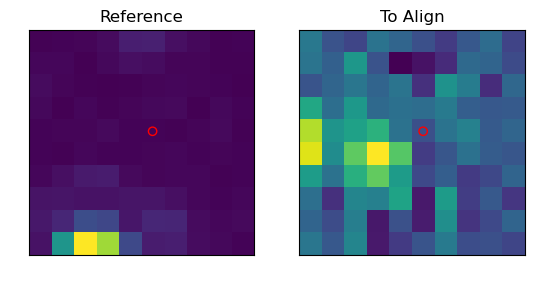

In [308]:
star_location = SkyCoord('17:46:22.0712917539','-28:33:14.5885494198',unit=(u.hourangle,u.deg))
#shutil.copy(ofile, imfile)
align_image = imfile#glob.glob('mastDownload/JWST/*long*/*cal.fits')[0]
align_fits = fits.open(align_image)
align_fits_wcs = wcs.WCS(fits.getheader(align_image, ext=1))
#align_fits['SCI',1].header['CRPIX1']+=(3.95*u.arcsec/pixel_scale).value
#align_fits['SCI',1].header['CRPIX2']+=(0.9*u.arcsec/pixel_scale).value
#align_fits.writeto(align_image,overwrite=True)

align_data = fits.open(align_image)['SCI',1].data
ref_y,ref_x = skycoord_to_pixel(star_location,wcs.WCS(ref_fits['SCI',1],ref_fits))
align_y,align_x = skycoord_to_pixel(star_location,wcs.WCS(align_fits['SCI',1],align_fits))

cutout_size=10.

ref_cutout = extract_array(ref_data,(cutout_size,cutout_size),(ref_x,ref_y))
align_cutout = extract_array(align_data,(cutout_size,cutout_size),(align_x,align_y))
norm1 = simple_norm(np.nan_to_num(ref_cutout), stretch='log', max_percent=99.95, log_a=1)#simple_norm(ref_cutout,stretch='linear',min_cut=-.5,max_cut=3)
norm2 = simple_norm(np.nan_to_num(align_cutout), stretch='log', max_percent=99.95, log_a=1)#simple_norm(align_cutout,stretch='linear',min_cut=-.5,max_cut=3)
fig,axes = plt.subplots(1,2)
axes[0].imshow(ref_cutout, origin='lower',
                      norm=norm1)
axes[0].scatter(cutout_size/2, cutout_size/2, edgecolor='r', facecolor='none')
axes[1].imshow(align_cutout, origin='lower',
                      norm=norm2)
axes[1].scatter(cutout_size/2, cutout_size/2, edgecolor='r', facecolor='none')
axes[0].set_title('Reference')
axes[1].set_title('To Align')
axes[0].tick_params(labelcolor='none',axis='both',color='none')
axes[1].tick_params(labelcolor='none',axis='both',color='none')

plt.show()
